# Simple Linear Regression for Salary Data

In [1]:
#import  the library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Import Data

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Data Cleaning 

In [12]:
# test does it have a zero value
df.isnull().sum()*100/ (df.shape[0])
## There are no NULL values in the dataset, hence it is clean.

YearsExperience    0.0
Salary             0.0
dtype: float64

# Explory  Data Analysis 

In [27]:
#Data Visualization 
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [28]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [26]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

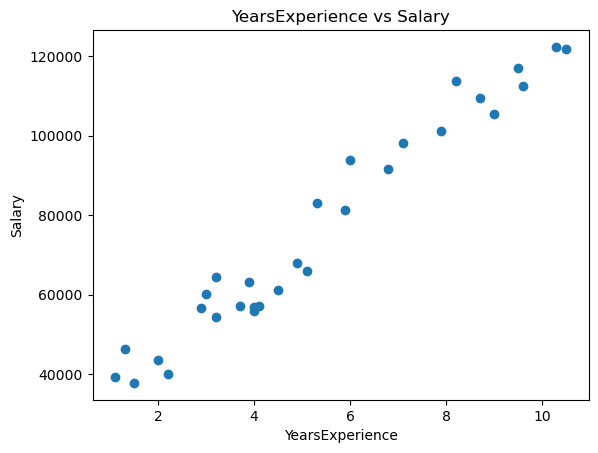

In [30]:
plt.scatter(x,y)
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

according to the visualization following the most fausable model is simple linear regression

# Model building

In [ ]:
Performing Simple Linear Regression

Performing Simple Linear Regression

Equation of linear regression y= c + m1x1 + m2x2+...+mn*xn

y : is the response, c : is the intercept, m1 : is the coefficient for the first feature,
            mn : is the coefficient for the nth feature,

In our case: y = c + m*YearsExperience

The m values are called the model coefficients or model parameters.

Generic Steps in model building

We first assign the feature variable, YearsExpereance , in this case, to the variable X and the response variable, Salary, to the variable y.

# Train /Test split  

In [31]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [38]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=100
)

Buiduíng a Linear Model

In [39]:
from sklearn import linear_model

reg= linear_model.LinearRegression()
reg.fit(x_train,y_train) 
print(' coefficient m :', reg.coef_)
print('coefficient m :', reg.intercept_)

 coefficient m : [9731.20383825]
coefficient m : 25202.887786154883


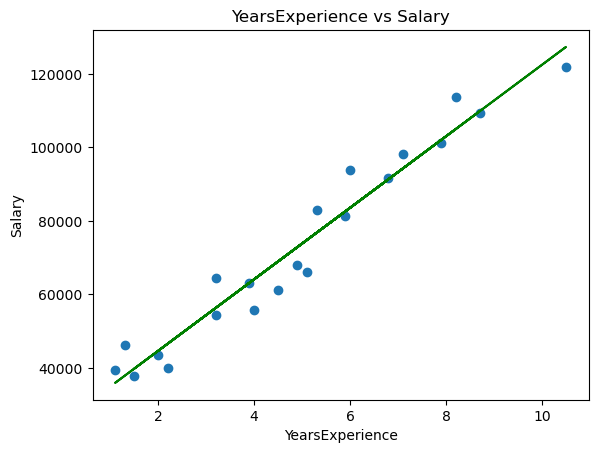

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.intercept_+ reg.coef_[0]*x_train,color="g")
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# Model Evaluation

In [43]:
y_train_pred = reg.predict(x_train)
res = y_train - y_train_pred

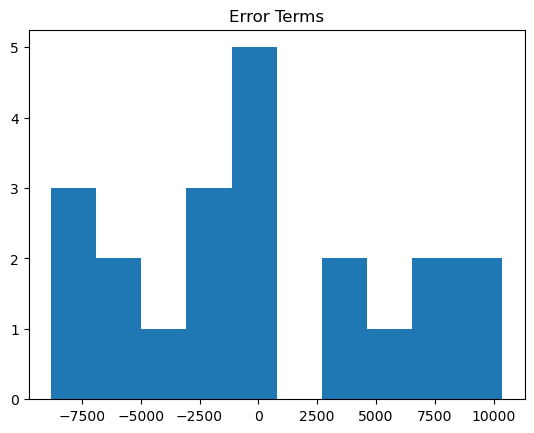

In [45]:
plt.hist(res,bins=10)
plt.title('Error Terms')
plt.show()

 The residuals are following the normally distributed with a mean 0. All good!

--

In [47]:
y_test_pred = reg.predict(x_test)
y_test 

array([ 57189., 116969., 122391.,  57081.,  56642.,  56957., 112635.,
       105582.,  60150.])

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Looking at the RMSE

In [49]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

5505.479002176146

### Checking the R-squared on the test set

In [50]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9627668685473267